## Simple Linear Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [23]:
data = pd.read_csv('Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


### Simple Regression Plot

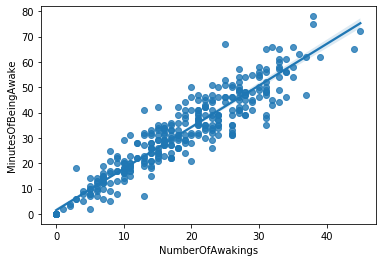

In [27]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)
plt.show()

[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

### Estimating OLS using statsmodels

In [9]:
import statsmodels.api as sm

In [10]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |  
 |  Ordinary Least Squares
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result s

In [11]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Sat, 05 Dec 2020   Prob (F-statistic):          1.89e-189
Time:                         09:59:20   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimating OLS parameters using scipy.stats

In [12]:
from scipy.stats import linregress
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [13]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err  = linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.6405141436199793
The intercept is: 1.4381033523783202


#### Calculating Confidence Intervals

In [14]:
from scipy import stats
help(stats.t.interval)
d_freedom = len(Y) - 2
stats.t.interval(0.95, d_freedom, slope, std_err)

Help on method interval in module scipy.stats._distn_infrastructure:

interval(alpha, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Confidence interval with equal areas around the median.
    
    Parameters
    ----------
    alpha : array_like of float
        Probability that an rv will be drawn from the returned range.
        Each value should be in the range [0, 1].
    arg1, arg2, ... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        location parameter, Default is 0.
    scale : array_like, optional
        scale parameter, Default is 1.
    
    Returns
    -------
    a, b : ndarray of float
        end-points of range that contain ``100 * alpha %`` of the rv's
        possible values.



(1.5861092535293086, 1.69491903371065)

#### Predictions

In [15]:
predictions = [intercept + slope*x for x in X]
print(predictions)

[39.16992865563785, 35.888900368397884, 42.4509569428778, 35.888900368397884, 73.62072567165741, 52.294041804597676, 21.12427307581807, 27.68632965029799, 30.967357937537948, 19.483758932198093, 14.562216501338154, 45.73198523011776, 37.529414512017865, 44.09147108649778, 44.09147108649778, 40.81044279925782, 32.60787208115792, 1.4381033523783202, 47.37249937373774, 29.326843793917966, 53.93455594821766, 44.09147108649778, 42.4509569428778, 55.57507009183764, 44.09147108649778, 57.21558423545761, 49.01301351735772, 26.04581550667801, 57.21558423545761, 45.73198523011776, 32.60787208115792, 50.6535276609777, 42.4509569428778, 24.40530136305803, 50.6535276609777, 6.359645783238258, 35.888900368397884, 24.40530136305803, 24.40530136305803, 29.326843793917966, 22.764787219438052, 19.483758932198093, 1.4381033523783202, 16.202730644958134, 50.6535276609777, 39.16992865563785, 44.09147108649778, 37.529414512017865, 49.01301351735772, 40.81044279925782, 47.37249937373774, 26.04581550667801, 2

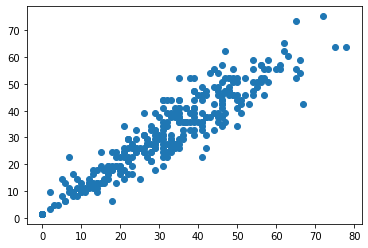

In [16]:
np.corrcoef(Y, predictions)
plt.scatter(Y, predictions)

#### Calculating residuals

In [17]:
residuals = [Y[i] - predictions[i] for i in range(len(Y))]

## Using sklearn

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
help(linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [19]:
X = X.values.reshape(-1, 1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

0.9059552749155962

In [20]:
print(lm.intercept_)
print(lm.coef_)
predictions = lm.predict(X)
print(r2_score(Y, predictions))
print(mean_squared_error(Y, predictions))


1.4381033523782953
[1.64051414]
0.9059552749155962
32.24298427103866


## Logistic Regression

In [21]:
churn = pd.read_csv('../../04_bi-tableau/04_lab-bi-analysis-with-tableau/data/churn.csv')

FileNotFoundError: [Errno 2] File ../../04_bi-tableau/04_lab-bi-analysis-with-tableau/data/churn.csv does not exist: '../../04_bi-tableau/04_lab-bi-analysis-with-tableau/data/churn.csv'

In [ ]:
churn.head()

In [ ]:
churn.dtypes

In [ ]:
churn['Churn']

In [ ]:
Y = pd.DataFrame(np.where(churn['Churn']=='Yes', 1, 0))
X = churn[['MonthlyCharges']]
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()
model.summary()